# Exercise - Iris Flower classification with SVM

The iris flower dataset is perhaps the most famous dataset for classification. It contains 3 types of flowers with 4 features (Sepal Length & Width, Petal Length & Width) https://archive.ics.uci.edu/ml/datasets/iris. 
We have to classify flowers based on their features. 

### Perform the following operations:

1. The flower column of the data is a string denoting the flower. Convert Iris-setosa, Iris-versicolor and Iris-virginica to numbers 0, 1, 2 respectively with a lambda method and apply method of pandas.
2. Plot a bar chart of the flowers. (type of flower vs number of flowers of each type)
3. Plot a pair wise plot of each feature(as shown below). Give Legends and colors for each flower. Based on these graphs, select two features for the flower classification. Which two features can you select?
4. Make two variables, x & y. x holds the two features you selected, and y is the type of the flower. These are inputs for our SVM. 
4. Let's prep our data. Split your dataset into training and testing. It should be 80:20 split, with random state 6354. Again let's view how many flowers of each type were taken in training. Plot a bar chart of each flower vs number of flowers in **training data set**.  
5. Train a linear SVM model with the training data set. 
6. Obtain predictions for the test data set & plot a heatmap of the confusion matrix.
7. Get the separating hyperplane using the meshgrid approach and plot the training data over it. (looks like that as below!)

![Image](iris.png)
![Image](iris_svm.png)

import pandas as pd
from sklearn.svm import SVC
import numpy as np
from matplotlib import pyplot as plt
from sklearn import linear_model

In [61]:
cols = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'flower']
x_cols = cols[:-1]
iris_data = pd.read_csv("iris.data.txt", header=None, names=cols)
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [62]:

#here we can't fit muliticlass classification in 2d 
#so we will consider only those data that give correct prediction
#Q The flower column of the data is a string denoting the flower. Convert Iris-setosa, Iris-versicolor and Iris-virginica to numbers 0, 1, 2 respectively with a lambda method and apply method of pandas.
d={'Iris-setosa':0,'Iris-versicolor':1,'Iris-virginica':2}
iris_data['flower']=iris_data['flower'].apply(lambda x:d[x])
iris_data.head()

,sepal_length,sepal_width,petal_length,petal_width,flower
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


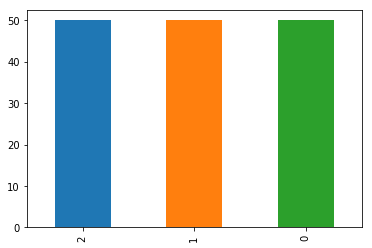

In [63]:
#Plot a bar chart of the flowers. (type of flower vs number of flowers of each type)
iris_data['flower'].value_counts().plot(kind='bar')

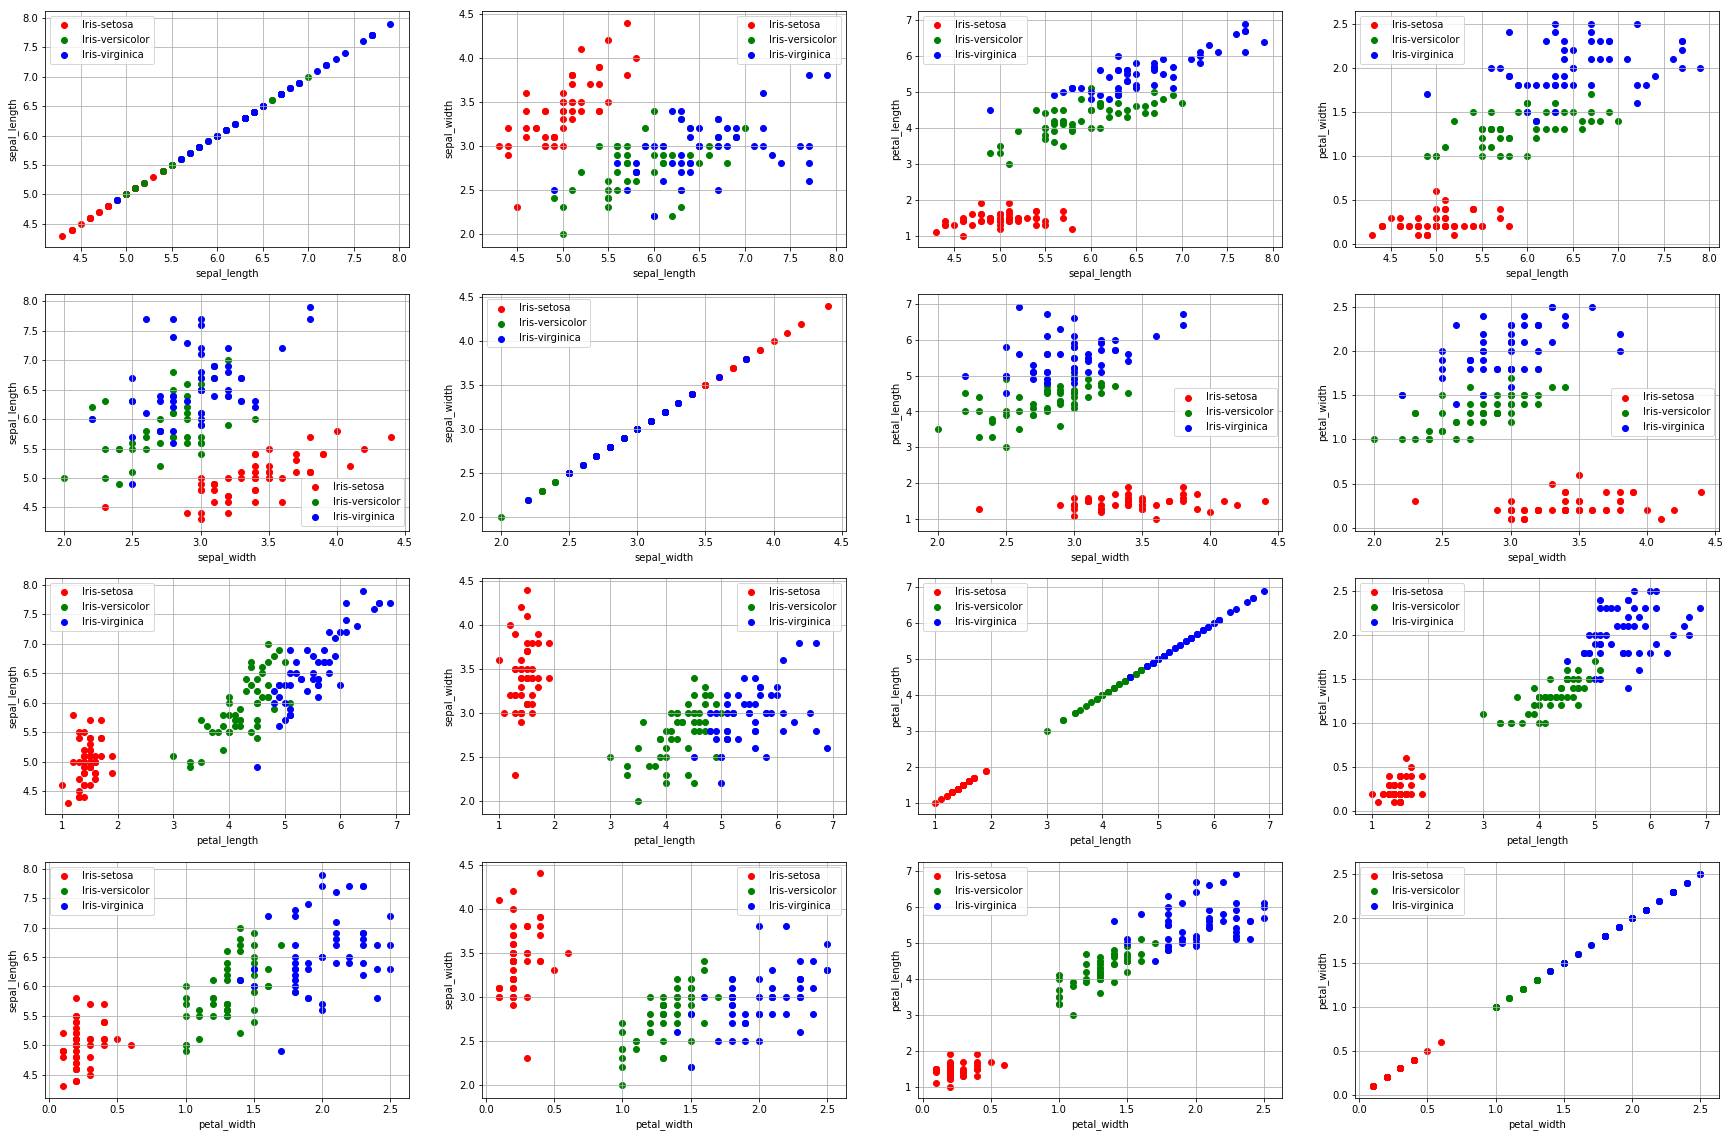

In [65]:
#Plot a pair wise plot of each feature(as shown below). Give Legends and colors for each flower. Based on these graphs, select two features for the flower classification. Which two features can you select?
plt.figure(figsize=(30,20)) 
setosa=iris_data[iris_data['flower']==0]
versicolor=iris_data[iris_data['flower']==1]
virginica=iris_data[iris_data['flower']==2]
a=1
for i in range(0,4):
    for j in range(0,4):
        plt.subplot(4,4,a)
        a=a+1    
        plt.scatter(setosa[iris_data.columns[i]],setosa[iris_data.columns[j]],color='r',label='Iris-setosa')
        plt.scatter(versicolor[iris_data.columns[i]],versicolor[iris_data.columns[j]],color='g',label='Iris-versicolor')
        plt.scatter(virginica[iris_data.columns[i]],virginica[iris_data.columns[j]],color='b',label='Iris-virginica')
        plt.legend()
        plt.grid()
        plt.ylabel(iris_data.columns[j])
        plt.xlabel(iris_data.columns[i])


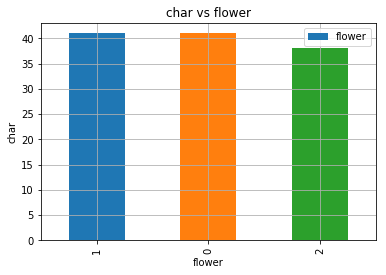

In [66]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=\
train_test_split(iris_data[['petal_length','petal_width']],iris_data['flower'],test_size=0.2,random_state=6354)
plt.figure()
plt.title('char vs flower')
plt.xlabel('flower')
plt.ylabel('char')
y_train.value_counts().plot(kind='bar')
plt.axis()
plt.legend()
plt.grid()
#here plotting 4 points only train points

In [67]:
#Make two variables, x & y. x holds the two features you selected, and y is the type of the flower. These are inputs for our SVM.
SVCClassifier=SVC(kernel='linear',C=10,max_iter=100)#using liner line for classification,penalty is 10 if miss any point,is c(penalty)=1 then it becomes lineient and skips few points here it will make all true
SVCModel=SVCClassifier.fit(x_train,y_train)

In [68]:
from sklearn import metrics
prediction=SVCModel.predict(x_test)
metrics.confusion_matrix(y_test,prediction)

array([[ 9,  0,  0],
       [ 0,  9,  0],
       [ 0,  1, 11]], dtype=int64)

In [69]:
import seaborn as sb

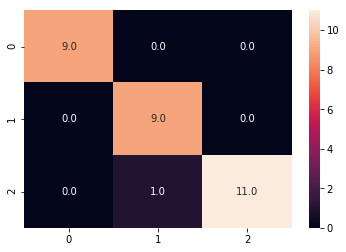

In [70]:
sb.heatmap(metrics.confusion_matrix(y_test,prediction),annot=True,fmt='.1f')

[[0.   0.01 0.02 ... 7.97 7.98 7.99]
 [0.   0.01 0.02 ... 7.97 7.98 7.99]
 [0.   0.01 0.02 ... 7.97 7.98 7.99]
 ...
 [0.   0.01 0.02 ... 7.97 7.98 7.99]
 [0.   0.01 0.02 ... 7.97 7.98 7.99]
 [0.   0.01 0.02 ... 7.97 7.98 7.99]]
[[-0.5  -0.5  -0.5  ... -0.5  -0.5  -0.5 ]
 [-0.49 -0.49 -0.49 ... -0.49 -0.49 -0.49]
 [-0.48 -0.48 -0.48 ... -0.48 -0.48 -0.48]
 ...
 [ 2.97  2.97  2.97 ...  2.97  2.97  2.97]
 [ 2.98  2.98  2.98 ...  2.98  2.98  2.98]
 [ 2.99  2.99  2.99 ...  2.99  2.99  2.99]]
[0.   0.01 0.02 0.03 0.04 0.05 0.06 0.07 0.08 0.09]
[-0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5 -0.5]
[[ 0.   -0.5 ]
 [ 0.01 -0.5 ]
 [ 0.02 -0.5 ]
 [ 0.03 -0.5 ]
 [ 0.04 -0.5 ]
 [ 0.05 -0.5 ]
 [ 0.06 -0.5 ]
 [ 0.07 -0.5 ]
 [ 0.08 -0.5 ]
 [ 0.09 -0.5 ]
 [ 0.1  -0.5 ]
 [ 0.11 -0.5 ]
 [ 0.12 -0.5 ]
 [ 0.13 -0.5 ]
 [ 0.14 -0.5 ]
 [ 0.15 -0.5 ]
 [ 0.16 -0.5 ]
 [ 0.17 -0.5 ]
 [ 0.18 -0.5 ]
 [ 0.19 -0.5 ]]
[0 0 0 ... 2 2 2]
[[0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 [0 0 0 ... 1 1 1]
 ...
 [0 0 0 ... 2 2 2]
 [0 

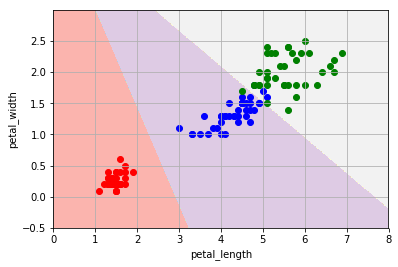

In [83]:
import numpy as np

x_min,x_max=0,8#minimum x/y is 0 and maximum x/y is1
y_min,y_max=-0.5,3

xx,yy=np.meshgrid(np.arange(x_min,x_max, .01),np.arange(y_min,y_max, .01))

print(xx); print(yy);
xx_lin=xx.ravel(); print(xx_lin[:10]);
yy_lin=yy.ravel(); print(yy_lin[:10]); 
pred_input=np.c_[xx_lin,yy_lin];print(pred_input[:20])

z=SVCModel.predict(pred_input);print(z)
z=z.reshape(xx.shape);print(z)
plt.figure()
plt.contourf(xx,yy,z,cmap=plt.cm.Pastel1)


plt.scatter(x_train[y_train==0]['petal_length'],x_train[y_train==0]['petal_width'],color='r',label='Iris-setosa')
plt.scatter(x_train[y_train==1]['petal_length'],x_train[y_train==1]['petal_width'],color='b',label='Iris-veriscolor')
plt.scatter(x_train[y_train==2]['petal_length'],x_train[y_train==2]['petal_width'],color='g',label='Iris-virginica')
plt.xlabel('petal_length')
plt.ylabel('petal_width')
plt.axis()
plt.grid()